**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from joblib import dump, load

In [38]:
df = pd.read_csv(r"D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv")

In [39]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Data Preprocessing**

In [40]:
df = df.drop(columns=['Stroke Risk (%)'])

In [41]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [42]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [43]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [44]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [45]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

- Resampling

In [47]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [49]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [50]:
cb = CatBoostClassifier(verbose=0, random_state=42)
cb.fit(X_train, y_train)

In [51]:
y_pred = cb.predict(X_val)

In [52]:
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_val, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")
print()

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2444
           1       1.00      1.00      1.00      4556

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Confusion Matrix:
[[2444    0]
 [   0 4556]]



**BLIND TEST**

In [54]:
y_pred2 = cb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred2)}")
print()

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2448
           1       1.00      1.00      1.00      4552

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Confusion Matrix:
[[2448    0]
 [   0 4552]]



In [69]:
# Taking some data from test set for single prediction test
new_data = scaler.transform([[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 77]]) # Stroke
y_blind = cb.predict(new_data)
print(F"Predicted Class: {y_blind}")
if y_blind == 0: 
    print("Not Stroke")
elif y_blind == 1:
    print("Stroke")
else:
    print("Error")

Predicted Class: [1]
Stroke


c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
# Taking some data from test set for single prediction test
new_data = scaler.transform([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 57]]) # Not Stroke
y_blind = cb.predict(new_data)
print(F"Predicted Class: {y_blind}")
if y_blind == 0: 
    print("Not Stroke")
elif y_blind == 1:
    print("Stroke")
else:
    print("Error")

Predicted Class: [0]
Not Stroke


c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
y_blind = cb.predict(new_data)
print(y_blind)

[0]


**Saving Model**

In [59]:
# Saving Model
dump(cb, 'model.joblib')

['model.joblib']

In [60]:
# Loading Saved Model
loaded_model = load('model.joblib')
loaded_scaler = load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

In [61]:
print("===== Loaded Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded_model)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_loaded_model)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_loaded_model)}")
print()

===== Loaded Model Performance =====
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2448
           1       1.00      1.00      1.00      4552

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Confusion Matrix:
[[2448    0]
 [   0 4552]]



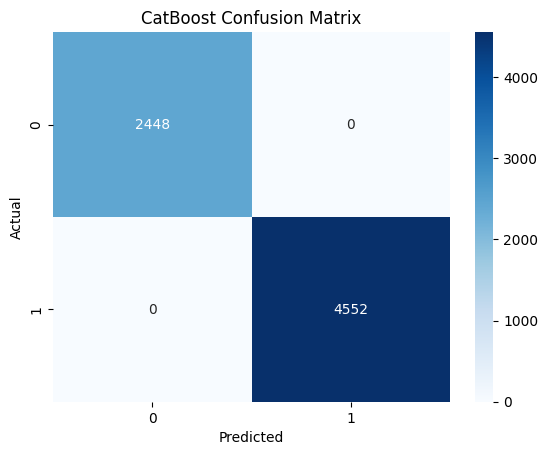

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()